In [1]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('personal_loan.csv')
df = df.set_index('ID') 

Actividad 2
Obtén las estadísticas descriptivas de las variables numéricas y examina cuidadosamente los valores obtenidos de cada columna.
Filtra el dataframe para visualizar los registros en que la edad supera los 100 años y elimínalos si no son pausibles.
Analiza el resto de las variables y elimina aquellos registros que contengan valores inválidos o inconsistentes. Para cada acción que realices, justifica la decisión, explicando por qué consideras que el valor es incorrecto.
¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) y qué porcentaje representa respecto al total del dataframe inicial?


In [2]:
# Revisar estadísticas descriptivas y tipos de datos
df.describe()
df.info()

# Renombrar columnas con espacios para facilitar el manejo
df.rename(columns={'Securities Account': 'Securities_Account'}, inplace=True)
df.rename(columns={'Personal Loan': 'Personal_Loan'}, inplace=True)
df.rename(columns={'CD Account': 'CD_Account'}, inplace=True)
df.rename(columns={'ZIP Code': 'ZIP_Code'}, inplace=True)

# Filtrar y eliminar registros con edad > 100 (implausibles)
df = df[df['Age'] <= 100]

# Asegurar que Education solo tenga valores 1, 2 o 3 (máximo posgrado)
df = df[df['Education'] <= 3]
df['Education'] = df['Education'].astype(int)

# Normalizar columnas binarias (Yes/No → 1/0)
bin_cols = ["Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
df[bin_cols] = df[bin_cols].astype(str).replace({"Yes": 1, "No": 0})
df[bin_cols] = df[bin_cols].astype(int)

print(df[bin_cols].head())  # Verificación rápida

# Eliminar registros con valores imposibles
df = df[df["Family"] >= 1]                        # No puede haber familia <= 0
df = df[df["Experience"] >= 1]                    # No puede haber experiencia negativa
df = df[(df["ZIP_Code"] >= 10000) & (df["ZIP_Code"] <= 99999)]  # ZIP debe tener 5 dígitos


<class 'pandas.core.frame.DataFrame'>
Index: 5037 entries, 0 to 5036
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5037 non-null   int64  
 1   Experience          5037 non-null   int64  
 2   Income              5037 non-null   int64  
 3   ZIP Code            5037 non-null   int64  
 4   Family              5037 non-null   int64  
 5   CCAvg               5037 non-null   float64
 6   Education           5037 non-null   float64
 7   Mortgage            5037 non-null   int64  
 8   Personal Loan       5037 non-null   object 
 9   Securities Account  5037 non-null   object 
 10  CD Account          5037 non-null   object 
 11  Online              5037 non-null   object 
 12  CreditCard          5037 non-null   object 
dtypes: float64(2), int64(6), object(5)
memory usage: 550.9+ KB
    Personal_Loan  Securities_Account  CD_Account  Online  CreditCard
ID                           

¿Cuántos registros se eliminaron (considerando todas las acciones de este ejercicio) 
y qué porcentaje representa respecto al total del dataframe inicial?

In [3]:
# Número inicial y final de registros
n_inicial = 5037
n_final = len(df)

eliminados = n_inicial - n_final
porcentaje = (eliminados / n_inicial) * 100

#Respuesta
print(f"Registros iniciales: {n_inicial}")
print(f"Registros finales:   {n_final}")
print(f"Eliminados:          {eliminados} ({porcentaje:.2f}%)")

Registros iniciales: 5037
Registros finales:   4912
Eliminados:          125 (2.48%)


Actividad 3
Obtén las estadísticas descriptivas de las variables de texto e imprime las frecuencias de sus categorías.
Algunas columnas almacenan valores binarios utilizando distintos formatos. Unifica estos valores de manera consistente, 
asegurándote de que coincidan con la descripción de las variables al inicio de esta libreta.
0 = No
1 = Si

In [4]:
df[bin_cols].describe()

for col in bin_cols:
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(3))

Personal_Loan
0    4434
1     478
Name: count, dtype: int64
Personal_Loan
0    0.903
1    0.097
Name: proportion, dtype: float64
Securities_Account
0    4400
1     512
Name: count, dtype: int64
Securities_Account
0    0.896
1    0.104
Name: proportion, dtype: float64
CD_Account
0    4610
1     302
Name: count, dtype: int64
CD_Account
0    0.939
1    0.061
Name: proportion, dtype: float64
Online
1    2945
0    1967
Name: count, dtype: int64
Online
1    0.6
0    0.4
Name: proportion, dtype: float64
CreditCard
0    3462
1    1450
Name: count, dtype: int64
CreditCard
0    0.705
1    0.295
Name: proportion, dtype: float64


Actividad 4

Verifica si hay registros duplicados y si fuera así, elimínalos del dataframe.
Asegúrate de reiniciar el índice para mantener una secuencia continua tras todas
las eliminaciones de registros que hasta este punto se han realizado.

In [5]:
# Verificar duplicados en todo el dataframe
duplicados = df.duplicated().sum()
print(f"Registros duplicados encontrados: {duplicados}")

# Si existen, eliminarlos
if duplicados > 0:
    df = df.drop_duplicates().copy()
    print("Duplicados eliminados.")

# Reiniciar índice después de todas las eliminaciones
df = df.reset_index(drop=True)

# Comprobar forma final
print("Shape final:", df.shape)
print("Primeras filas después de reiniciar índice:")
print(df.head())


Registros duplicados encontrados: 36
Duplicados eliminados.
Shape final: (4876, 13)
Primeras filas después de reiniciar índice:
   Age  Experience  Income  ZIP_Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91108       4    1.6          1         0   
1   45          19      34     90089       3    1.5          1         0   
2   39          15      11     94720       1    1.0          1         0   
3   35           9     100     94112       1    2.7          2         0   
4   35           8      45     91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0    

Actividad 5

Aunque hasta ahora se han considerado los tipos de datos inferidos por pandas, 
antes del EDA es recomendable revisar la naturaleza estadística de cada variable
(continua, discreta, categórica, binaria, etc.) para aplicar el análisis adecuado.
Efectúa las siguientes conversiones:
Nominal: ZIP Code - object
Ordinal: Education - category con orden 1, 2, 3
Binarias: Personal Loan, Securities Account, CD Account, Online, CreditCard - category
Crea dos listas llamadas num_cols y cat_cols que contengan los nombres de las variables numéricas 
(int64, float64) y categóricas (object, category) del dataset, respectivamente.

In [6]:
# 1. Nominal: ZIP_Code como objeto (texto, no se hacen cálculos con él)
df["ZIP_Code"] = df["ZIP_Code"].astype(str)

# 2. Ordinal: Education (1=Graduado, 2=Universitario, 3=Posgrado)
df["Education"] = pd.Categorical(df["Education"],
                                 categories=[1, 2, 3],
                                 ordered=True)

# 3. Binarias: convertir a categóricas (0 = No, 1 = Sí)
bin_cols = ["Personal_Loan", "Securities_Account", "CD_Account", "Online", "CreditCard"]
for col in bin_cols:
    df[col] = df[col].astype("category")

# 4. Crear listas de variables numéricas y categóricas
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = df.select_dtypes(include=["object", "category"]).columns.tolist()

print("Variables numéricas:", num_cols)
print("Variables categóricas:", cat_cols)

Variables numéricas: ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
Variables categóricas: ['ZIP_Code', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


Parte 2: Análisis exploratorio de datos (univariado) 

Actividad 6

Para el análisis de las variables numéricas obtén nuevamente las estadísticas descriptivas incluyendo los valores de simetría y curtosis.
Clasifica las variables Age, Income y Mortgage según los valores observados de asimetría y curtosis.

In [7]:
#Definir variables
df_skew = df[['Age', 'Income', 'Mortgage']]

# Calcular asimetría y curtosis
skewness = df_skew.skew(numeric_only=True)
print(skewness)
kurtosis = df_skew.kurt(numeric_only=True)
print(kurtosis)

#Asimetría
for col in df_skew.columns:
    sk = skewness[col]
    if sk > 0.5:
        print(f"{col}: asimetría {sk:.3f}, sesgo positivo (cola hacia la derecha)")
    elif sk < -0.5:
        print(f"{col}: asimetría {sk:.3f}, sesgo negativo (cola hacia la izquierda)")
    else:
        print(f"{col}: asimetría {sk:.3f}, aproximadamente simétrica")

#Curtosis
# Clasificar cada variable
for col in df_skew.columns:
    ku = kurtosis[col]
    if ku > 0:
        print(f"{col}: curtosis {ku:.3f} → leptocúrtica (más concentrada, colas pesadas)")
    elif ku < 0:
        print(f"{col}: curtosis {ku:.3f} → platicúrtica (aplanada)")
    else:
        print(f"{col}: curtosis {ku:.3f} → mesocúrtica (similar a normal)")

Age        -0.018857
Income      0.841197
Mortgage    2.102130
dtype: float64
Age        -1.165360
Income     -0.044562
Mortgage    4.756991
dtype: float64
Age: asimetría -0.019, aproximadamente simétrica
Income: asimetría 0.841, sesgo positivo (cola hacia la derecha)
Mortgage: asimetría 2.102, sesgo positivo (cola hacia la derecha)
Age: curtosis -1.165 → platicúrtica (aplanada)
Income: curtosis -0.045 → platicúrtica (aplanada)
Mortgage: curtosis 4.757 → leptocúrtica (más concentrada, colas pesadas)


Actividad 7

Genera un histograma para cada variable numérica, incluyendo la curva KDE y la curva de una distribución normal como referencia.
Para las variables que clasificaste antes, compara los histogramas generados con los valores numéricos calculados y comenta si la forma de cada distribución coincide con lo esperado.
Para cada variable, crea un gráfico de boxplot individual que incluya la media.
Analiza la posición de la media respecto a la mediana. ¿Qué indica esta relación sobre el sesgo (asimetría) de la distribución?

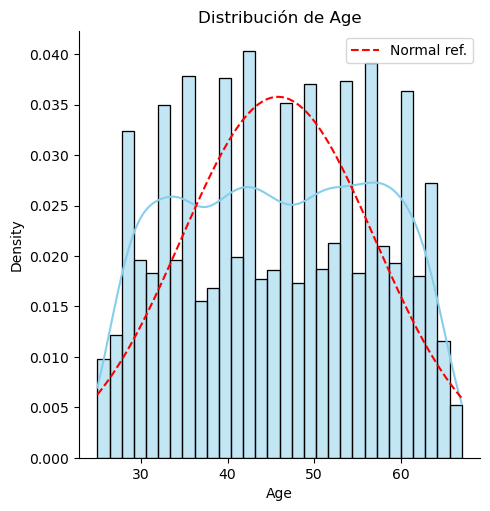

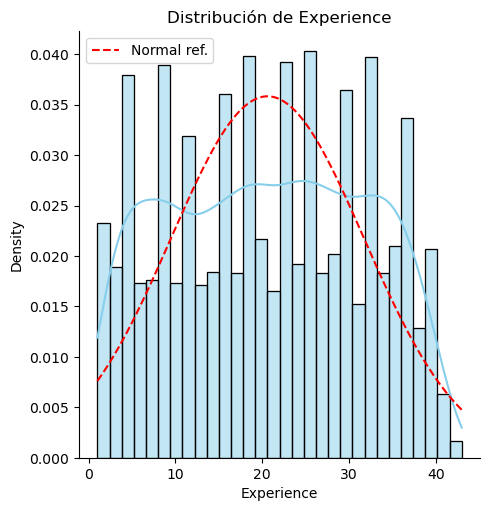

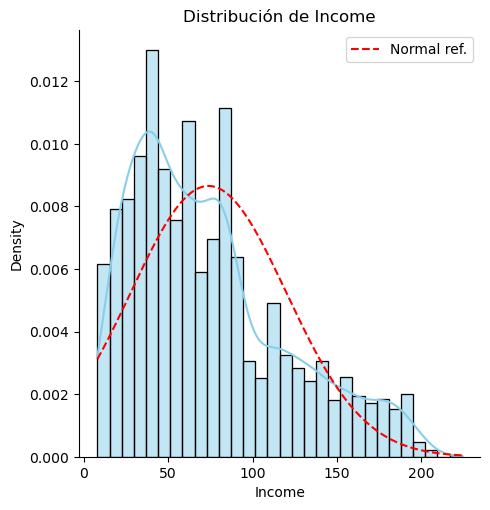

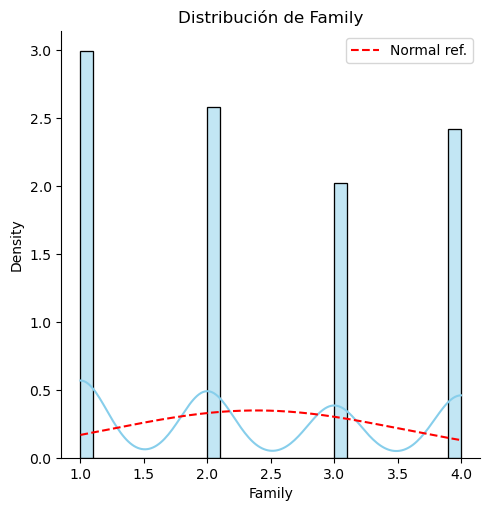

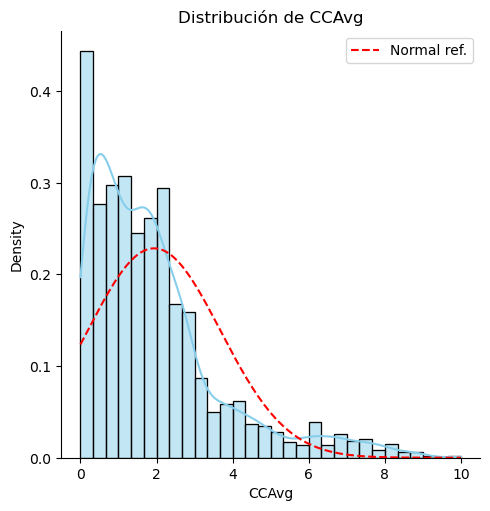

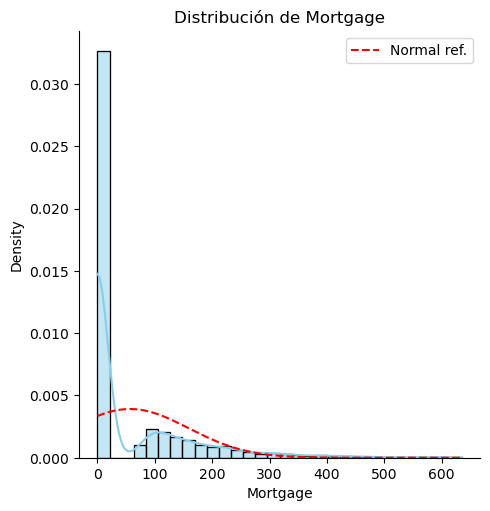

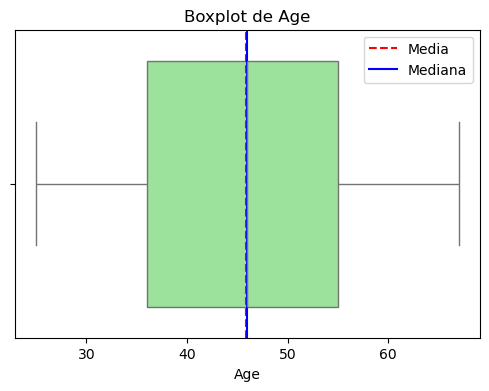

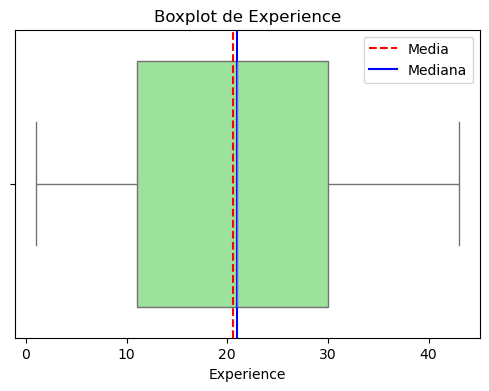

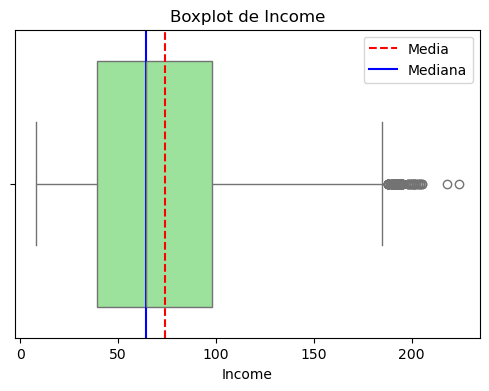

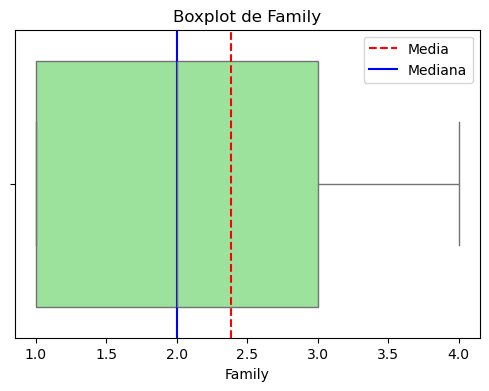

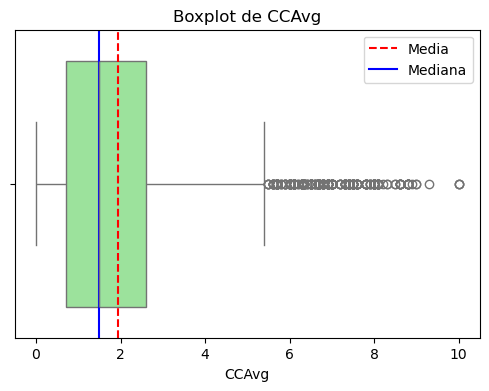

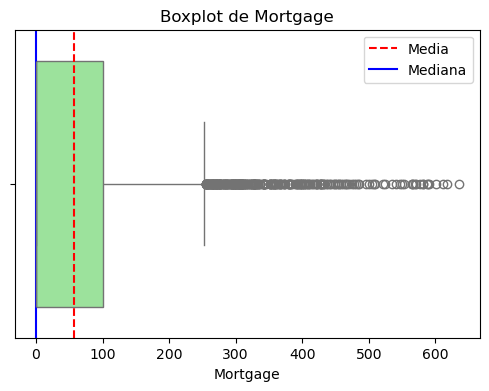

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

num_cols = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']

# --------- Histogramas con KDE y curva normal ---------
for col in num_cols:
    g = sns.displot(df[col], kde=True, bins=30, color="skyblue", stat="density")
    
    mu, sigma = df[col].mean(), df[col].std()
    x = np.linspace(df[col].min(), df[col].max(), 200)
    plt.plot(x, norm.pdf(x, mu, sigma), 'r--', label='Normal ref.')
    
    plt.title(f"Distribución de {col}")
    plt.legend()
    plt.show()

# --------- Boxplots con media ---------
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color="lightgreen")
    
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Media')
    plt.axvline(df[col].median(), color='blue', linestyle='-', label='Mediana')
    
    plt.title(f"Boxplot de {col}")
    plt.legend()
    plt.show()

Respuesta
En las variables Age y Experience, la media es apenas menor que la mediana, lo que indica una distribución prácticamente simétrica con un ligero sesgo negativo.
Por otro lado, en Income, Family, CCAvg y Mortgage, la media está por encima de la mediana, lo que refleja un sesgo positivo: la mayoría de los valores son bajos,
pero existen algunos muy altos que alargan la cola hacia la derecha.

Actividad 8

Obtén las estadísticas descriptivas de las variables categóricas.
Genera un gráfico de barras para cada variable. En las de alta cardinalidad, 
sólo incluye los 10 valores más relevantes.


--- ZIP_Code ---
ZIP_Code
94720    163
94305    121
95616    114
90095     69
93106     56
        ... 
91024      1
90813      1
94970      1
94566      1
94598      1
Name: count, Length: 466, dtype: int64
ZIP_Code
94720    0.033
94305    0.025
95616    0.023
90095    0.014
93106    0.011
         ...  
91024    0.000
90813    0.000
94970    0.000
94566    0.000
94598    0.000
Name: proportion, Length: 466, dtype: float64

--- Education ---
Education
1    2062
3    1449
2    1365
Name: count, dtype: int64
Education
1    0.423
3    0.297
2    0.280
Name: proportion, dtype: float64

--- Personal_Loan ---
Personal_Loan
0    4404
1     472
Name: count, dtype: int64
Personal_Loan
0    0.903
1    0.097
Name: proportion, dtype: float64

--- Securities_Account ---
Securities_Account
0    4368
1     508
Name: count, dtype: int64
Securities_Account
0    0.896
1    0.104
Name: proportion, dtype: float64

--- CD_Account ---
CD_Account
0    4576
1     300
Name: count, dtype: int64
CD_Account
0  

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\1096657772.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10.index, y=top10.values, palette="viridis")


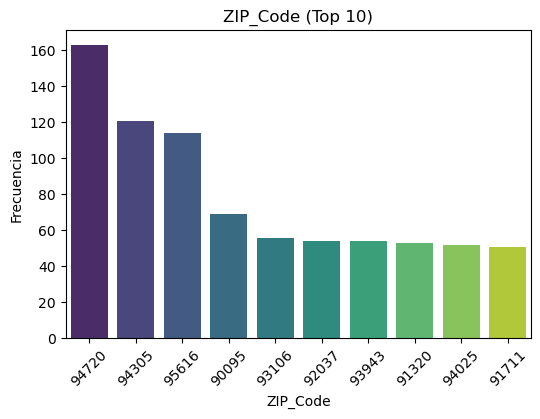

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\1096657772.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")


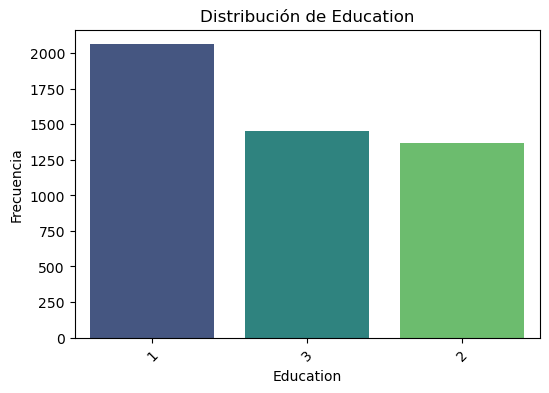

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\1096657772.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")


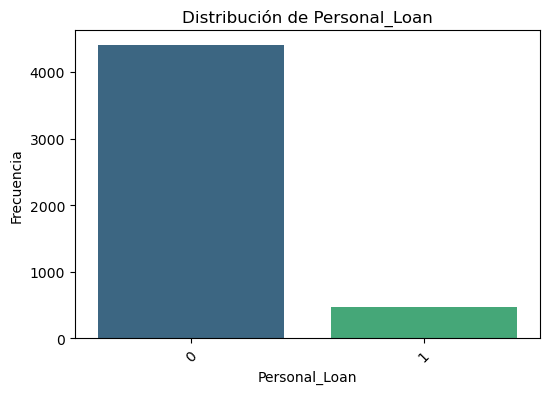

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\1096657772.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")


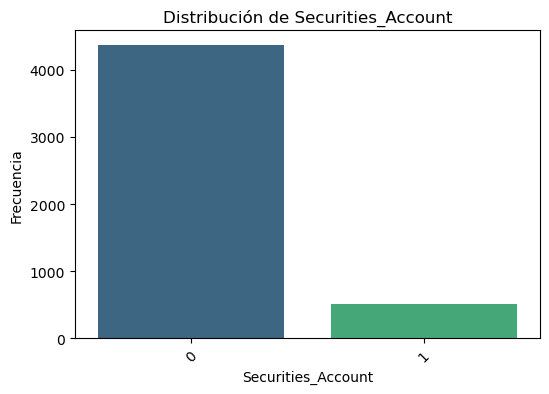

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\1096657772.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")


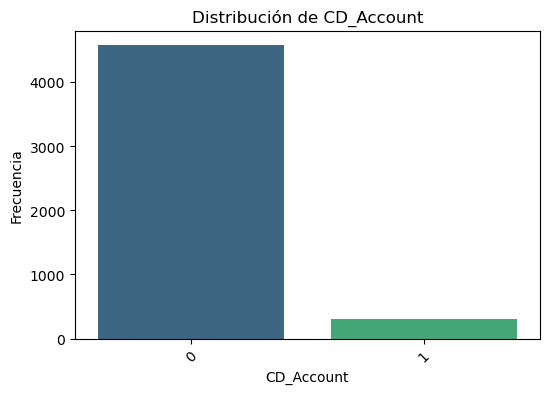

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\1096657772.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")


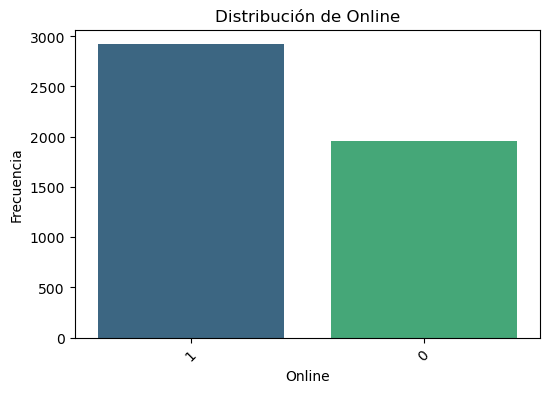

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\1096657772.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")


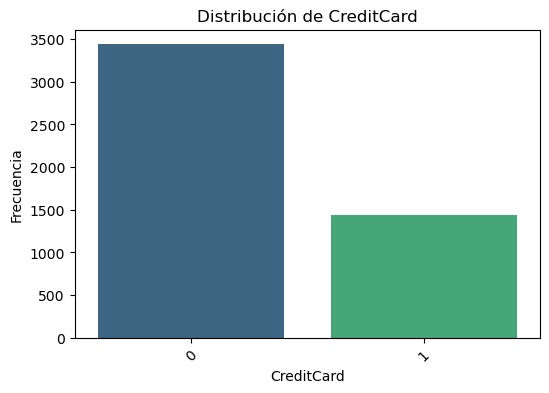

In [9]:
# Estadísticas descriptivas de categóricas
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print(df[col].value_counts(normalize=True).round(3))

# Gráficos de barras
for col in cat_cols:
    plt.figure(figsize=(6,4))
    
    # Si tiene más de 10 categorías → mostrar top 10
    if df[col].nunique() > 10:
        top10 = df[col].value_counts().head(10)
        sns.barplot(x=top10.index, y=top10.values, palette="viridis")
        plt.title(f"{col} (Top 10)")
    else:
        sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette="viridis")
        plt.title(f"Distribución de {col}")
    
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()

Parte 3: Análisis exploratorio de datos (bivariado) 

Actividad 9

Obtén la matriz de gráficos de dispersión (scatter matrix) de todas las variables numéricas.
Observa las relaciones entre las variables, selecciona un par representativo y describe los patrones o tendencias que sean evidentes.
Para cuantificar la fuerza y dirección de las relaciones observadas, genera un mapa de calor con los valores de correlación de Pearson. 
¿El valor numérico obtenido del par seleccionado se corresponde con lo esperado?


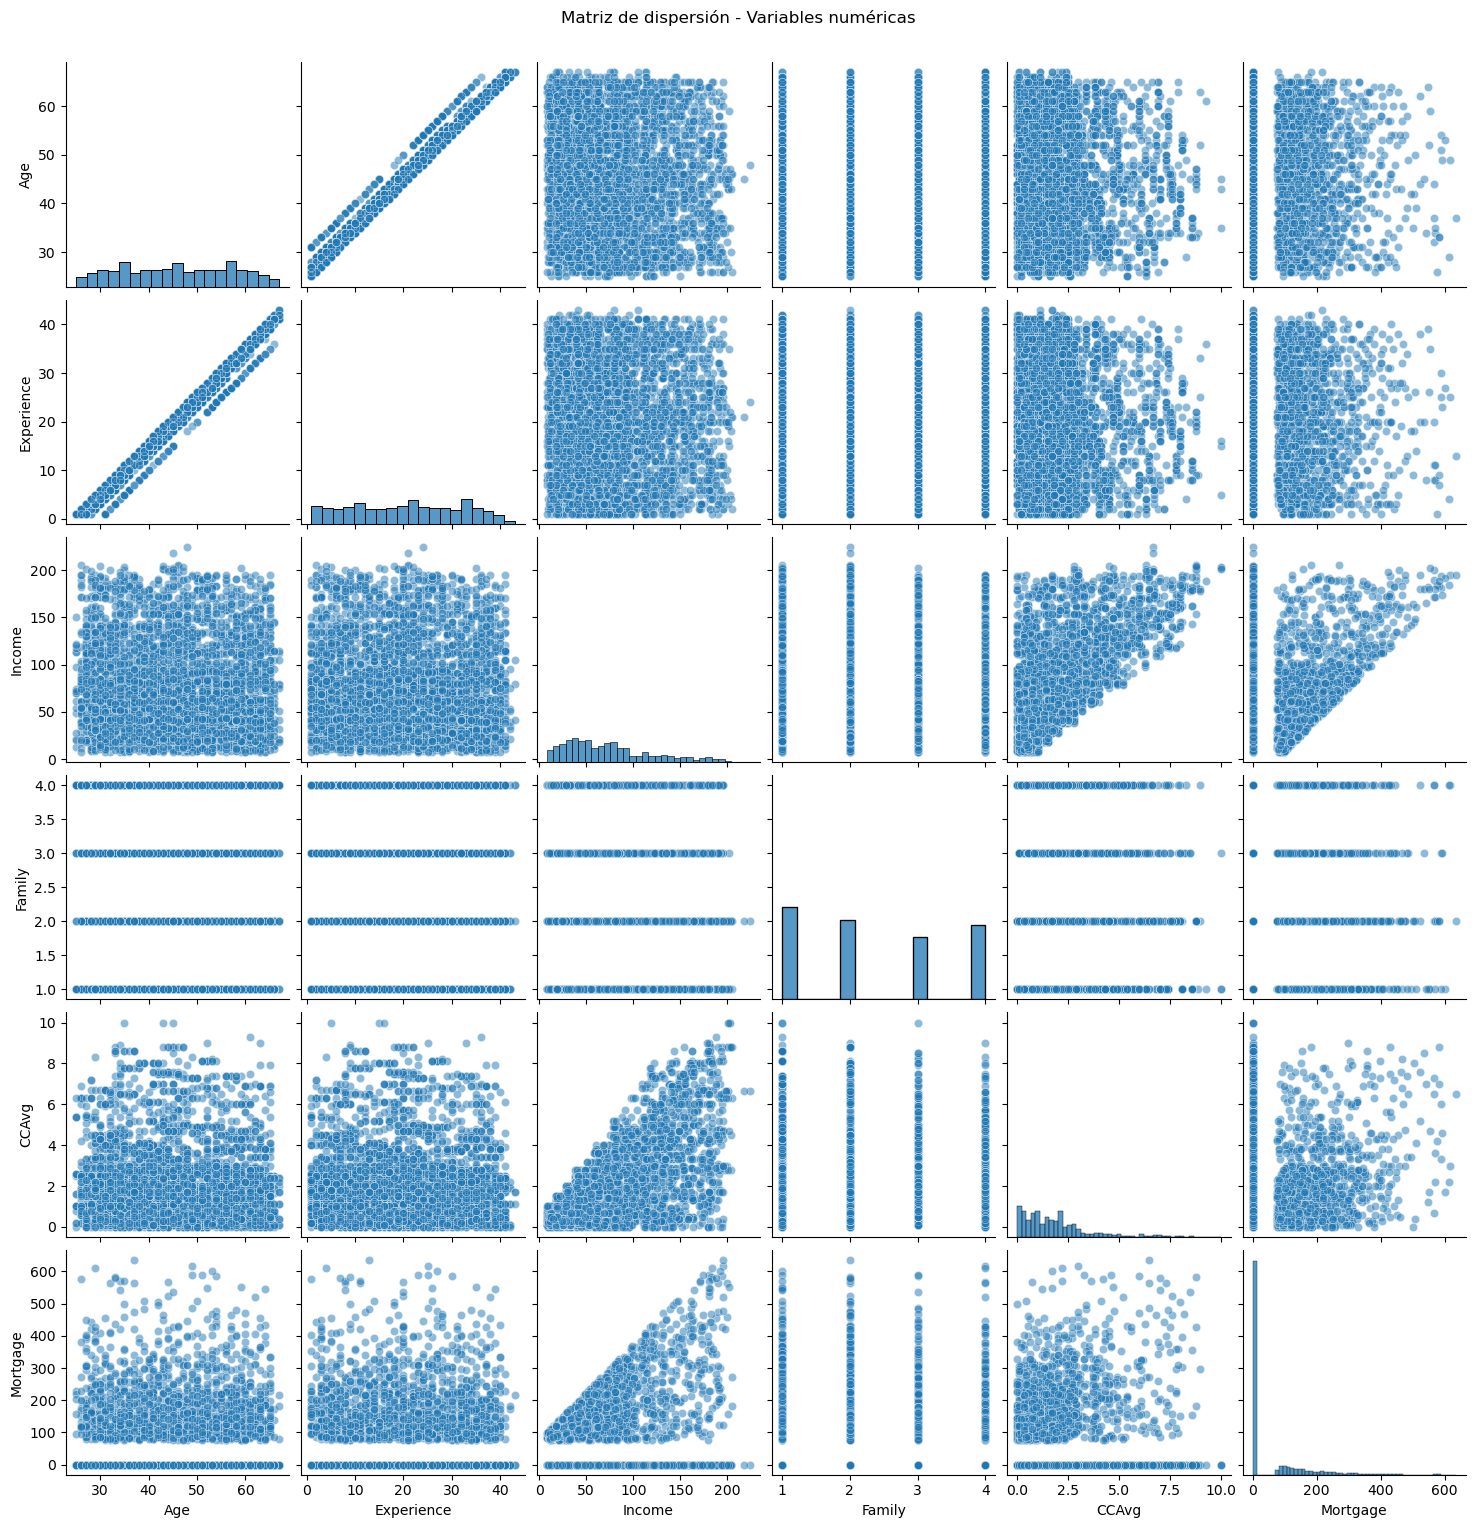

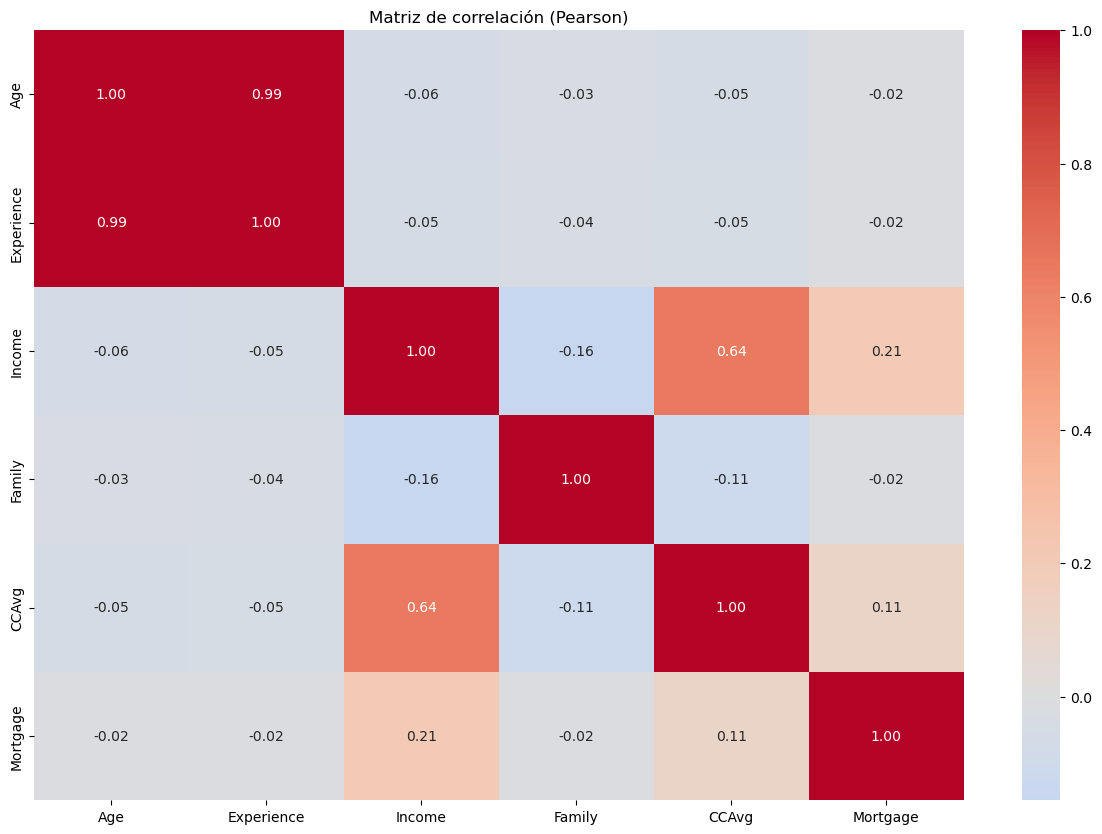

Correlación Income vs CCAvg: 0.6446446984872418


In [10]:
# Matriz de dispersión (pairplot)
sns.pairplot(df[num_cols], diag_kind="hist", plot_kws={'alpha':0.5})
plt.suptitle("Matriz de dispersión - Variables numéricas", y=1.02)
plt.show()

# Matriz de correlaciones con heatmap
corr = df[num_cols].corr(method='pearson')

plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Matriz de correlación (Pearson)")
plt.show()

# Valor de un par representativo
print("Correlación Income vs CCAvg:", corr.loc["Income", "CCAvg"])

Respuesta
En la matriz de dispersión se observa una tendencia positiva entre Income y CCAvg, ya que a mayores ingresos los clientes tienden a registrar un mayor gasto promedio con tarjeta de crédito.
El valor de correlación de Pearson obtenido para este par es 0.645, lo cual indica una relación positiva moderada-alta.
Este resultado coincide con lo esperado a partir de la visualización, confirmando que ambas variables están asociadas de manera consistente.

Actividad 10

Realiza un análisis de todas las variables del dataset con respecto a la variable de salida Personal Loan.
Variables numéricas: Genera box plots para comparar la distribución de cada variable según los valores de Personal Loan.
Variables categóricas (sin considerar ZIP Code): Genera gráficos de barras apiladas que muestren la distribución relativa de Personal Loan dentro de cada categoría de la variable.
Para cada grupo de variables (numéricas y categóricas), comenta al menos un hallazgo o patrón relevante observado en los gráficos generados.

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\3608681218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=col, data=df, palette="Set2")


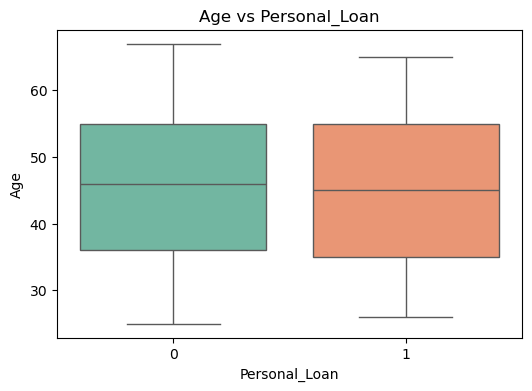

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\3608681218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=col, data=df, palette="Set2")


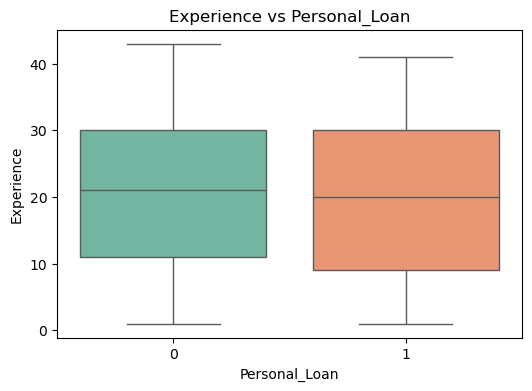

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\3608681218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=col, data=df, palette="Set2")


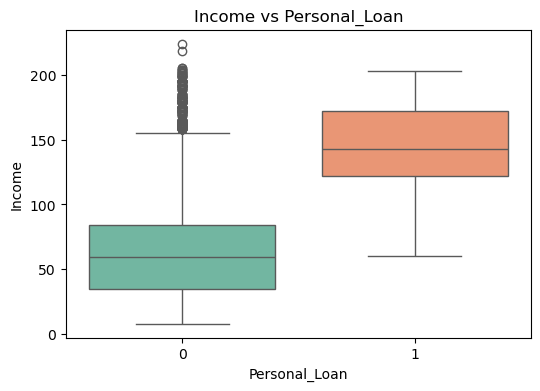

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\3608681218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=col, data=df, palette="Set2")


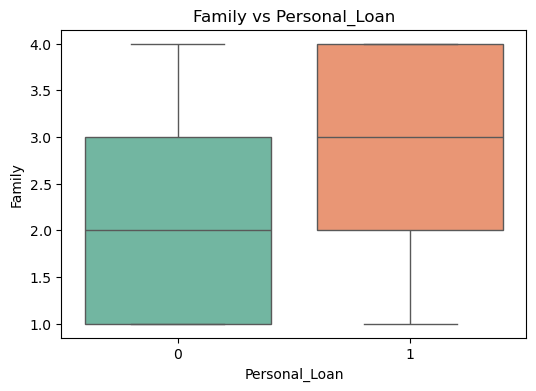

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\3608681218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=col, data=df, palette="Set2")


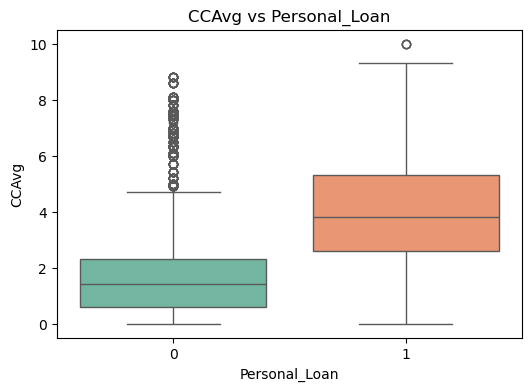

C:\Users\luist\AppData\Local\Temp\ipykernel_33944\3608681218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=col, data=df, palette="Set2")


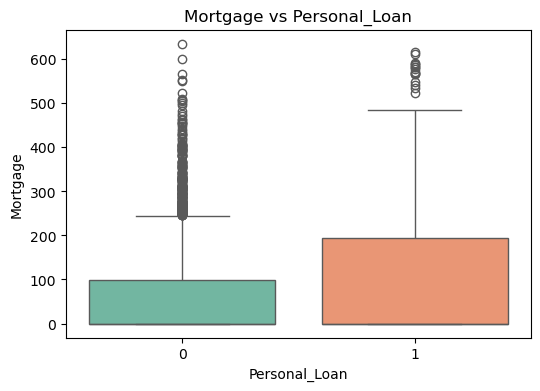

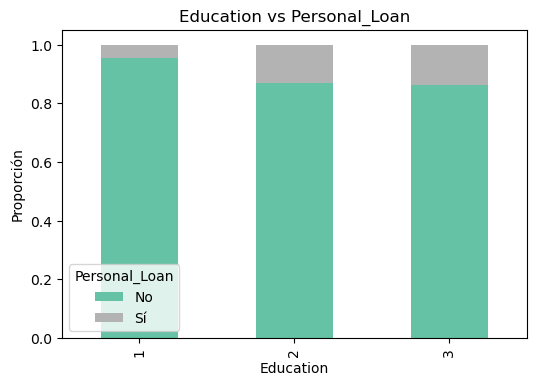

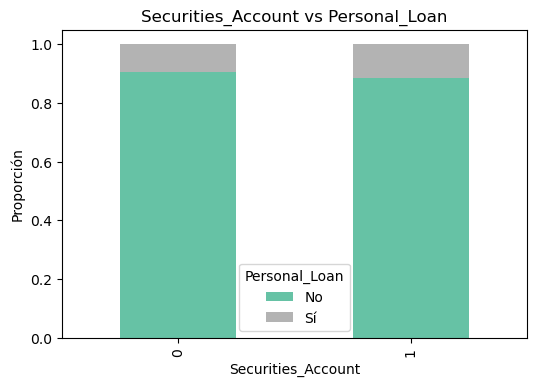

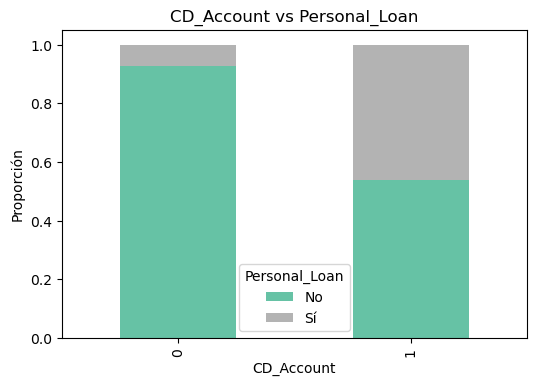

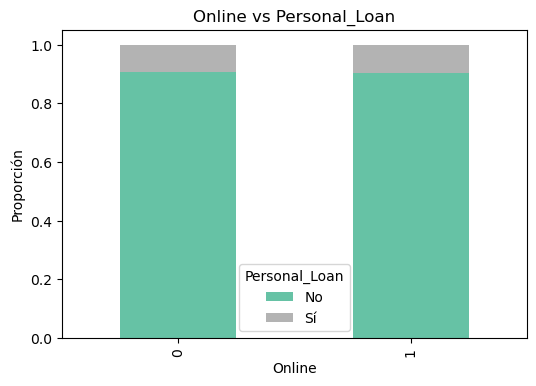

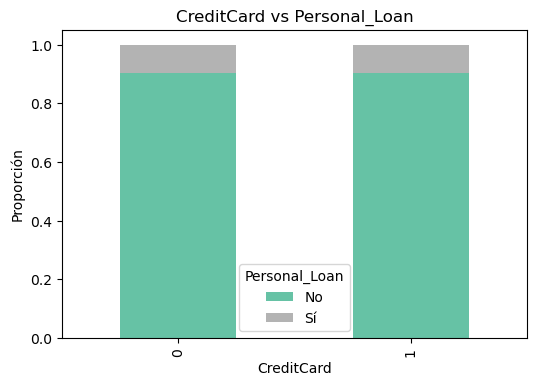

In [11]:
# Boxplots para cada variable numérica agrupadas por Personal_Loan
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Personal_Loan", y=col, data=df, palette="Set2")
    plt.title(f"{col} vs Personal_Loan")
    plt.show()

cat_cols = ["Education", "Securities_Account", "CD_Account", "Online", "CreditCard"]

for col in cat_cols:
    cross = pd.crosstab(df[col], df["Personal_Loan"], normalize="index")
    cross.plot(kind="bar", stacked=True, figsize=(6,4), colormap="Set2")
    plt.title(f"{col} vs Personal_Loan")
    plt.ylabel("Proporción")
    plt.legend(title="Personal_Loan", labels=["No", "Sí"])
    plt.show()


Variables numéricas (boxplots):
Las personas que aceptaron el préstamo suelen tener ingresos más altos (Income), gastar más con sus tarjetas de crédito (CCAvg) y
también tener hipotecas mayores (Mortgage). En cambio, la edad y la experiencia laboral no muestran diferencias importantes entre los grupos.
En cuanto a Family, se nota una ligera tendencia a que familias más grandes acepten un poco más los préstamos.

Variables categóricas (barras apiladas):
El nivel educativo es un factor importante: mientras más alto es el grado de estudios (Education), mayor es la proporción de aceptación.
También destaca que quienes tienen una cuenta de depósito a plazo (CD_Account) aceptan el préstamo en mucha mayor proporción. En el caso de la banca en línea (Online)
y las tarjetas de crédito (CreditCard), la diferencia es más leve, pero sí se observa un poco más de aceptación.
La cuenta de valores (Securities_Account) prácticamente no muestra relación.